### **Analisis de datos de la rotación de clientes en telecomunicaciones**

En el siguiente notebook se realiza una limpieza y posterior análisis de los datos de rotación de los usuarios de telecomunicaciones.

El dataset utilizado se encuentra disponible en kaggle: 
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Cada fila del dataset representa un cliente, cada columna contiene los atributos del cliente.

### **1. Importación del dataset**

En esta sección de importan las librerias necesarias y se carga el dataset

In [1]:
# importacion de las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importar datos y convertir a df
df = pd.read_csv('telcom_clients.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# shape del df
df.shape

(7043, 21)

### **2. Limpieza del dataframe**

En esta sección del notebook, se procede a realizar una limpieza de los datos. 

Los procesos realizados son: identificar los valores duplicados, cambiar los tipos de datos objeto al tipo correcto, identificar valores nulos y rellenar datos faltantes en caso de ser necesario.

### **2.1. Cambiar tipos de datos**

Se observa que varias columnas del dataframe son identificadas del tipo 'object'. En la siguiente sección se realiza el proceso de cambiarlas al tipo 'string' utilizando el metodo astype. Fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html   

In [5]:
# df
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
# columna total charges
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

La columna 'TotalCharges' fue interpretada como 'object', sin embargo, los datos son del tipo float. Se trata de convertir utilizando el método astype(), pero se obtiene un error, es por ello que se busca la presencia de valores nulos o simbolos en la columna.

In [8]:
# valores unicos
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# simbolos en la columna?
simbolos = df[df['TotalCharges'].str.contains(r'[,$]', na=False)]
print(simbolos)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [10]:
# celdas vacias?
celdas_vacias = df.loc[df['TotalCharges'].str.strip() == '']
print(celdas_vacias)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

Se identifica que el motivo por el cual la columna 'total charges' es interpretada como objeto es por la presencia de celdas vacias en la columna. Se opta por rellenar esas celdas vacias con NA por el momento utilizando el método to_numeric() y haciendo uso del parámetro errors, utilizando coerce para que las celdas vacias sean rellenadas con NaN.

In [11]:
# object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

La columna seniorcitizen usa 1 o 0 para identificar si el cliente se trata de alguien jubilado o no. Para fines practicos, se busca cambiar estos datos a yes o no, para facilitar su interpretacion. Esta idea fue recopilada de  https://www.kaggle.com/code/jahidhossen/telco-customer-churn-accuracy-0-89 

In [12]:
# unicos de citizen
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [13]:
# reemplazar 1 y 0 por yes o no 
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# verificar
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# df
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Las columnas que fueron interpretadas como object y son del tipo string, se convierten manualmente a string.

In [15]:
# object a string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
print('Los tipos de datos del dataframe ahora son:')
print(df.dtypes)

Los tipos de datos del dataframe ahora son:
customerID          string[python]
gender              string[python]
SeniorCitizen       string[python]
Partner             string[python]
Dependents          string[python]
tenure                       int64
PhoneService        string[python]
MultipleLines       string[python]
InternetService     string[python]
OnlineSecurity      string[python]
OnlineBackup        string[python]
DeviceProtection    string[python]
TechSupport         string[python]
StreamingTV         string[python]
StreamingMovies     string[python]
Contract            string[python]
PaperlessBilling    string[python]
PaymentMethod       string[python]
MonthlyCharges             float64
TotalCharges               float64
Churn               string[python]
dtype: object


### **2.2. Consistencia de datos categóricos**

En esta sección se identifican los valores únicos en columnas del dataframe, con intenciones de encontrar inconsistencias entre mayusculas y minusculas para una misma palabra.

In [16]:
# valores duplicados
duplicados = df.duplicated()

# número de duplicados
num_duplicados = duplicados.sum()
print("Número de registros duplicados: ",num_duplicados)

Número de registros duplicados:  0


No se encuentran valores duplicados en el dataframe.

A continución se identifican los valores únicos en las columnas categóricas.

In [17]:
# únicos en la columna custumerID
print(df['customerID'].unique())

<StringArray>
['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
 '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
 ...
 '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
 '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043, dtype: string


In [18]:
# df
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Como las columnas del tipo string son varias, se agregan las columnas string en categorical_cols y luego se recorre para hallar los valores unicos utilizando el metodo unique().

In [19]:
# columnas string
categorical_cols = ['customerID', 'SeniorCitizen','gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod','Churn']

# valores unicos de cada columna
for col in categorical_cols:
    print("Valores únicos en la columna: ",col)
    print(df[col].unique())
    print("\n")

Valores únicos en la columna:  customerID
<StringArray>
['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
 '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
 ...
 '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
 '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043, dtype: string


Valores únicos en la columna:  SeniorCitizen
<StringArray>
['No', 'Yes']
Length: 2, dtype: string


Valores únicos en la columna:  gender
<StringArray>
['Female', 'Male']
Length: 2, dtype: string


Valores únicos en la columna:  Partner
<StringArray>
['Yes', 'No']
Length: 2, dtype: string


Valores únicos en la columna:  Dependents
<StringArray>
['No', 'Yes']
Length: 2, dtype: string


Valores únicos en la columna:  PhoneService
<StringArray>
['No', 'Yes']
Length: 2, dtype: string


Valores únicos en la columna:  MultipleLines
<StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: string


Valores únicos en

### **2.3. Manejo de valores faltantes**

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario

In [20]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


In [21]:
# NA de total charges
df.loc[df.isnull()['TotalCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


La variable TotalCharges representa suma total de los pagos mensuales que realizó un cliente, dependiendo del servicio que tiene. Dado ese contexto y considerando que se tiene la variable tenure (cantidad de meses que el cliente pagó los servicios) y la variable monthly charges (monto mensual del servicio), se puede deducir que para completar los datos faltantes de totalcharges basta con realizar el producto de monthlycharges y tenure, en caso de que se disponga de esos datos. 

Por ello, se procede a verificar el comportamiento de la variable totalcharges en filas que no son nan.

In [22]:
# comportamiento de totalcharges en filas que no son nan
df[df['TotalCharges'].notna()][['tenure', 'MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [23]:
34*56.95

1936.3000000000002

In [24]:
45*42.30

1903.4999999999998

In [25]:
24*84.80

2035.1999999999998

Se puede validar que si, la columna se puede completar de esta forma, hay una ligera variación en la multiplicación directa respecto a lo que contiene la columna, sin embargo es infimo. 

In [26]:
# NA de total charges
df.loc[df.isnull()['TotalCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Sin embargo, no se dispone de los datos de ternure para las mismas celdas que no contienen datos de totalcharges. Podría rellenarse con el dato de monthly charges, pero el hecho de que no se especifiquen la cantidad de meses que estuvo el cliente tal vez indique que en realidad el cliente nunca fue cliente, tal vez indique que se realizaron tramites y se les ofreció el servicio por ese monto pero no llegaron a aceptarlo, no llegaron a usufructuarlo o algo parecido. Por esta razón, se decide rellenar los datos faltantes de totalcharges con 0.

In [27]:
# rellenar na
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [28]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
DeviceProtection,7043,0,0.0
TotalCharges,7043,0,0.0
MonthlyCharges,7043,0,0.0
PaymentMethod,7043,0,0.0
PaperlessBilling,7043,0,0.0
Contract,7043,0,0.0
StreamingMovies,7043,0,0.0
StreamingTV,7043,0,0.0
TechSupport,7043,0,0.0


### **2.4. Identificación de outliers**

En esta sección se busca identificar la presencia de outliers en el dataset. Por ejemplo, el pago mensual no puede ser superior al pago total, en todo caso debería ser igual y debería corresponder a haber abonado por el servicio solo un mes.

In [29]:
# filtrar
df[df['MonthlyCharges'] > df['TotalCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [30]:
# cantidad
df[df['MonthlyCharges'] > df['TotalCharges']].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

In [31]:
# porcentaje
(100*11)/7043

0.15618344455487718

Se identifica que si hay columnas en las que el pago mensual es superior al monto total. Corresponde al hecho de que se tiene el dato de el monto de pago mensual, pero se observa que en la columna ternure, los clientes no estuvieron un mes, es decir, se tiene 0. Lo que lleva a la conclusión de que posiblemente era una tarifa que se debia pagar pero el cliente no concretó el tiempo de uso como para ser cobrado, por ello la cantidad de meses es 0 y el monto total pagado es 0. Se toma la decisión de dejar los valores asi como están debido a que son menos del 1% de datos faltantes y en todo caso se considera que la empresa tiene paquetes de ese monto y las personas lo adquieren.

### **3. Análisis exploratorio de los datos**

In [32]:
# df
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# estadisticas del df
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### **Histrograma MonthlyCharges**

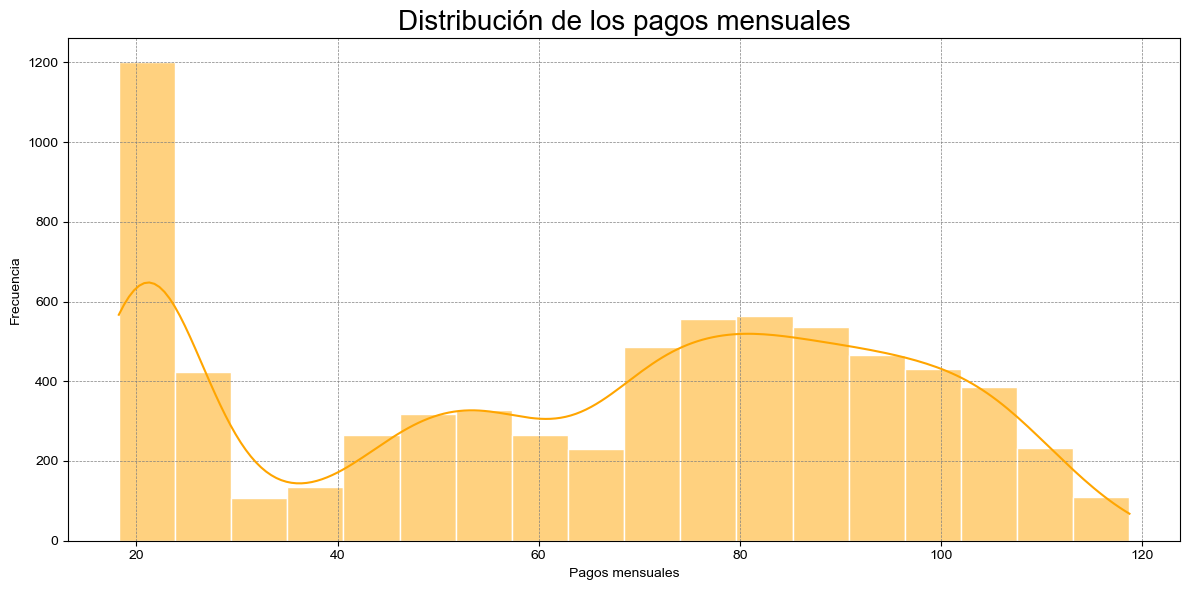

In [34]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# histograma de pagos mensuales
sns.histplot(data=df, x='MonthlyCharges', kde=True , color='orange', edgecolor='white')
ax.set_title('Distribución de los pagos mensuales', fontsize=20)
ax.set_xlabel('Pagos mensuales', fontsize=10)
ax.set_ylabel('Frecuencia', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

En el histograma se observa la distribución de los datos respecto al monto mensual que pagan los usuarios. Se puede decir que una gran cantidad de usuarios tienen servicios contratados entre 20$ mensuales. Y otro grupo, reducido pero homogéneo, tienen servicios que van entre 70 y 110$ mensuales. 

### **Boxplot por monto mensual y por genero**

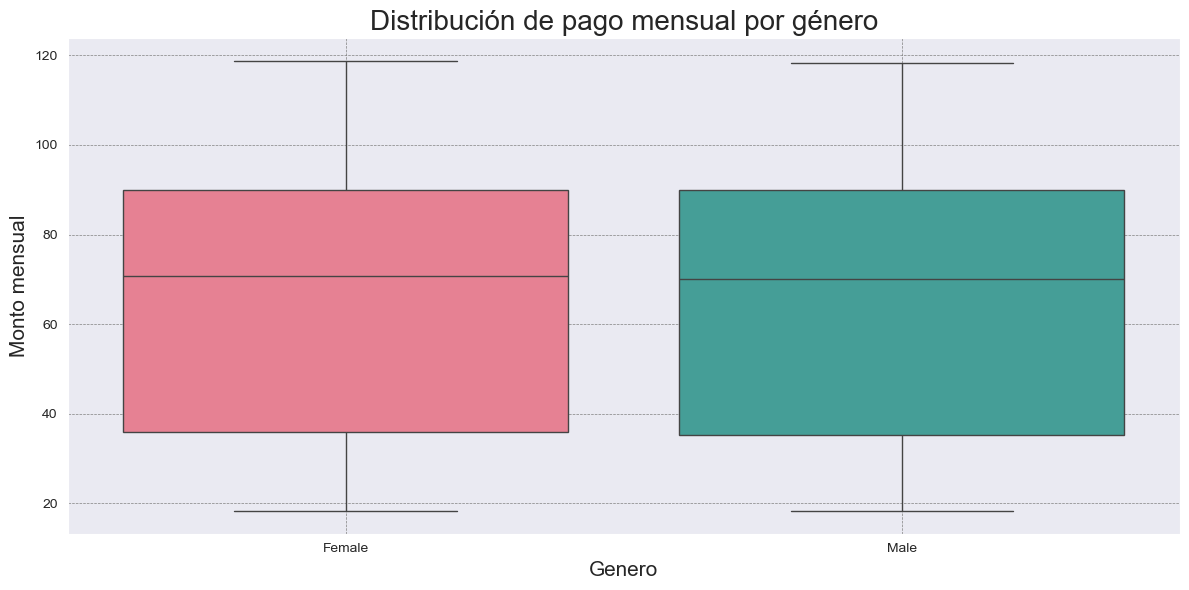

In [35]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 2)

# boxplot
sns.boxplot(data=df, x='gender', y='MonthlyCharges' , hue ='gender', palette=colors, legend=False)

# titulos
ax.set_title('Distribución de pago mensual por género', fontsize=20) 
ax.set_xlabel('Genero', fontsize=15)
ax.set_ylabel('Monto mensual', fontsize=15)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()


In [36]:
# monto mensual por genero
df_grouped = df.groupby("gender")['MonthlyCharges'].count().reset_index()
print(df_grouped)

# estadisticas
df_grouped.describe()

   gender  MonthlyCharges
0  Female            3488
1    Male            3555


,MonthlyCharges
count,2.000000
mean,3521.500000
std,47.376154
min,3488.000000
25%,3504.750000
50%,3521.500000
75%,3538.250000
max,3555.000000


La distribución de los datos respecto al género no es muy relevante, puesto que en ambos casos cuentan con una distribución similar. 

### **Gráfico de barras para servicios de streaming y pago mensual**

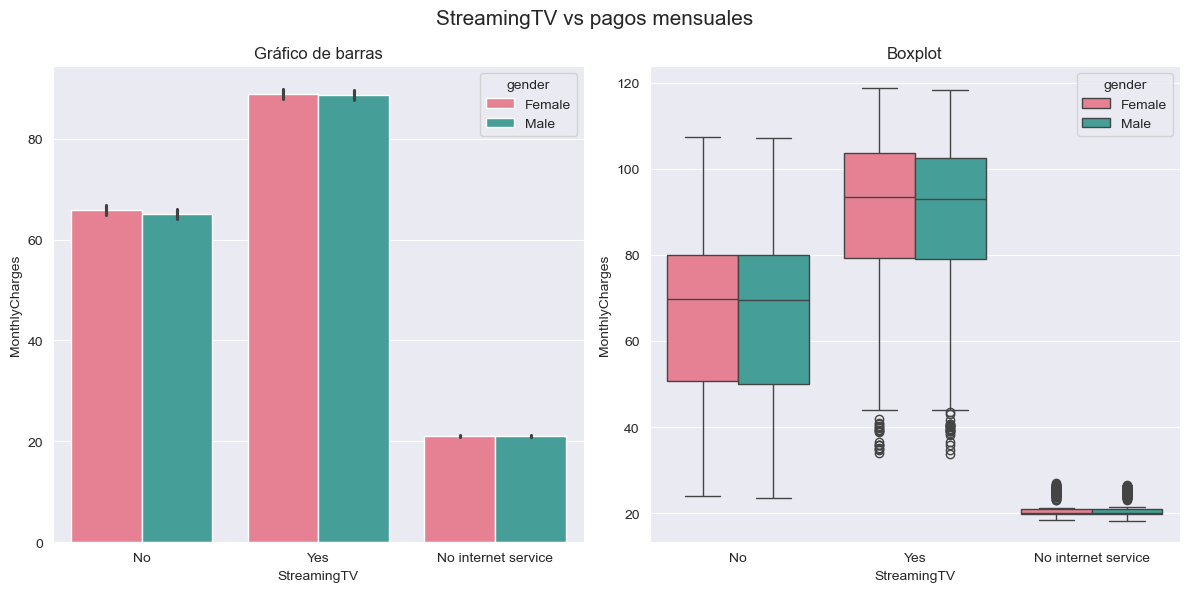

In [37]:
# crear figura y eje
fig, ax = plt.subplots(1,2,figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 2)

# gráfco de barras
sns.barplot(data=df, x='StreamingTV', y='MonthlyCharges', hue='gender', palette=colors, ax=ax[0])
ax[0].set_title('Gráfico de barras')

# boxplot
sns.boxplot(data=df, x='StreamingTV', y='MonthlyCharges' , hue ='gender', palette=colors, ax=ax[1])
ax[1].set_title('Boxplot')

# mostrar el gráfico
plt.suptitle('StreamingTV vs pagos mensuales', fontsize=15)
plt.tight_layout()
plt.show()

En ambos gráficos se observa que los servicios de streaming son contratados por la mayoria, sin importar el género, de hecho ya en los gráficos anteriores se observó que el género no es un discriminante. 

### **Gráfico de barras para los métodos de pago**

In [38]:
# monto mensual por metodo de pago
df_grouped = df.groupby("PaymentMethod")['MonthlyCharges'].mean().reset_index()
print(df_grouped)

# estadisticas
df_grouped.describe()

               PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)       67.192649
1    Credit card (automatic)       66.512385
2           Electronic check       76.255814
3               Mailed check       43.917060


,MonthlyCharges
count,4.000000
mean,63.469477
std,13.770848
min,43.917060
25%,60.863554
50%,66.852517
75%,69.458440
max,76.255814


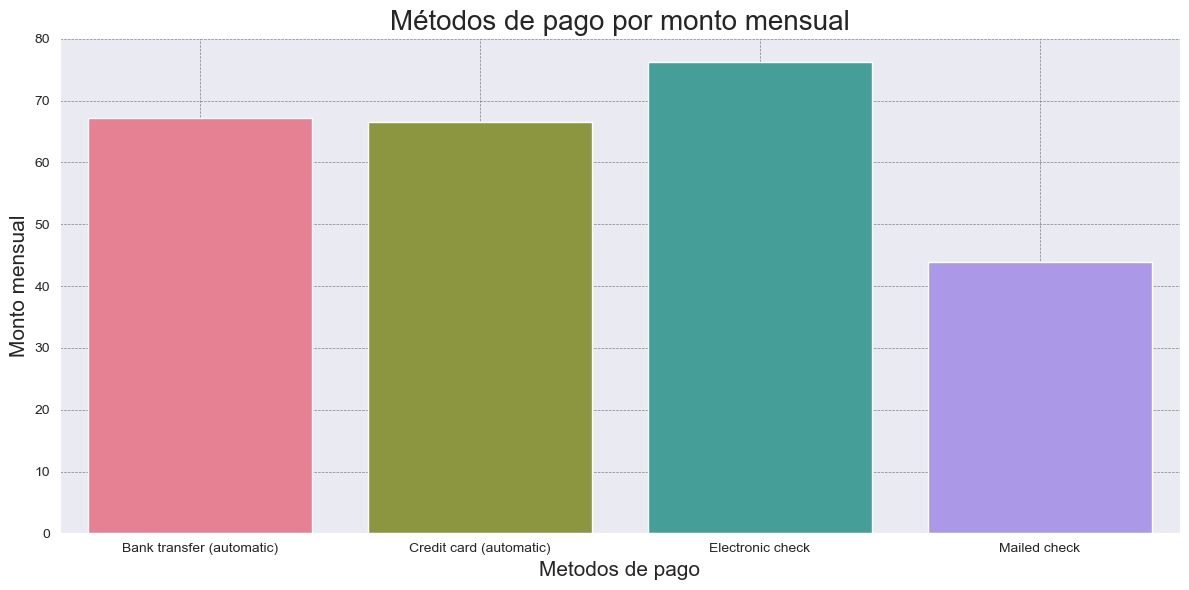

In [39]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 4)

# barras
sns.barplot(data=df_grouped, x='PaymentMethod', y ='MonthlyCharges', hue = 'PaymentMethod', palette=colors, legend=False)

# titulos
ax.set_title('Métodos de pago por monto mensual', fontsize=20) 
ax.set_xlabel('Metodos de pago', fontsize=15)
ax.set_ylabel('Monto mensual', fontsize=15)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

Aquí se observa que una mayor cantidad de personas prefieren el pago a través de un cheque electrónico, especialmente cuando la tarifa supera en promedio 65$ mensuales. En general, el método menos utilizado es el de cheque enviado por correo.

### **Gráfico de barras para los senior citizen** 


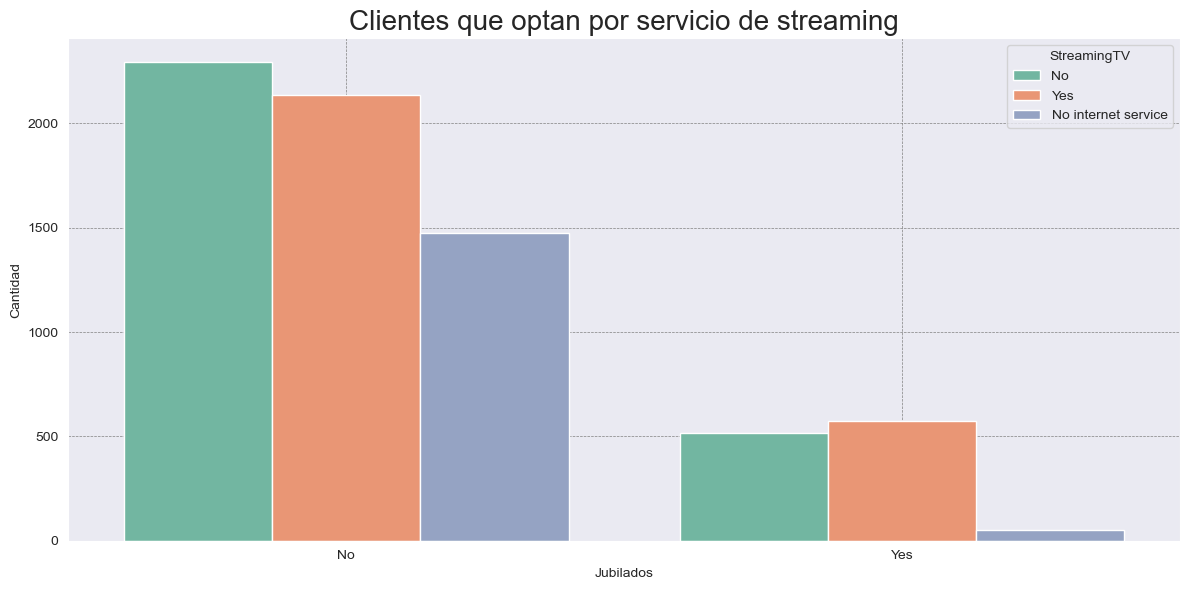

In [40]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("Set2", 3)

# grafico de barras por categoria
sns.countplot(data=df, x='SeniorCitizen', hue='StreamingTV' , palette=colors, edgecolor='white')
ax.set_title('Clientes que optan por servicio de streaming', fontsize=20)
ax.set_xlabel('Jubilados', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)
sns.set_style("darkgrid")

# # agregar leyendas  
# ax.set_xticklabels({"Jubilados","No Jubilados"})

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

Personas que son jubiladas optan en menor frecuencia por servicios de streaming.

### **Boxplot entre churn y tenure**

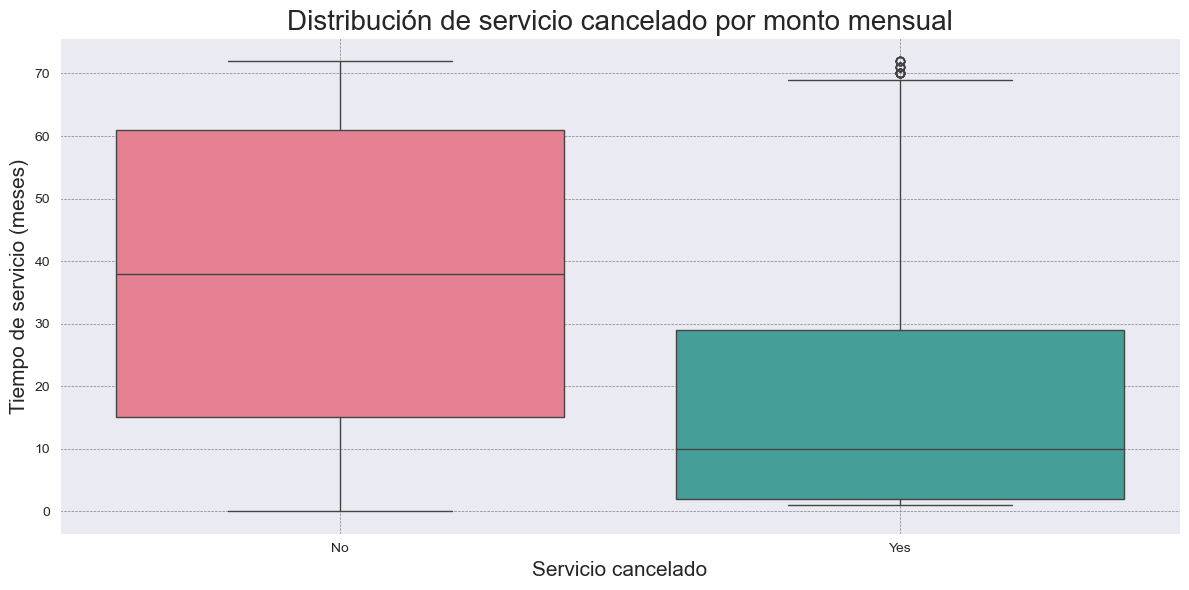

In [41]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 2)

# boxplot
sns.boxplot(data=df, x='Churn', y='tenure' , hue ='Churn', palette=colors, legend=False)

# titulos
ax.set_title('Distribución de servicio cancelado por monto mensual', fontsize=20) 
ax.set_xlabel('Servicio cancelado', fontsize=15)
ax.set_ylabel('Tiempo de servicio (meses)', fontsize=15)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

Se observa que, en general, los servicios que son cancelados son aquellos de aquellas personas que llevan menor tiempo como clientes. Podria decirse que, en su experiencia, los servicios no fueron buenos y por ende decidieron renunciar. 

In [43]:
df_grouped = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()
df_grouped

,Churn,MonthlyCharges
0,No,61.265124
1,Yes,74.441332


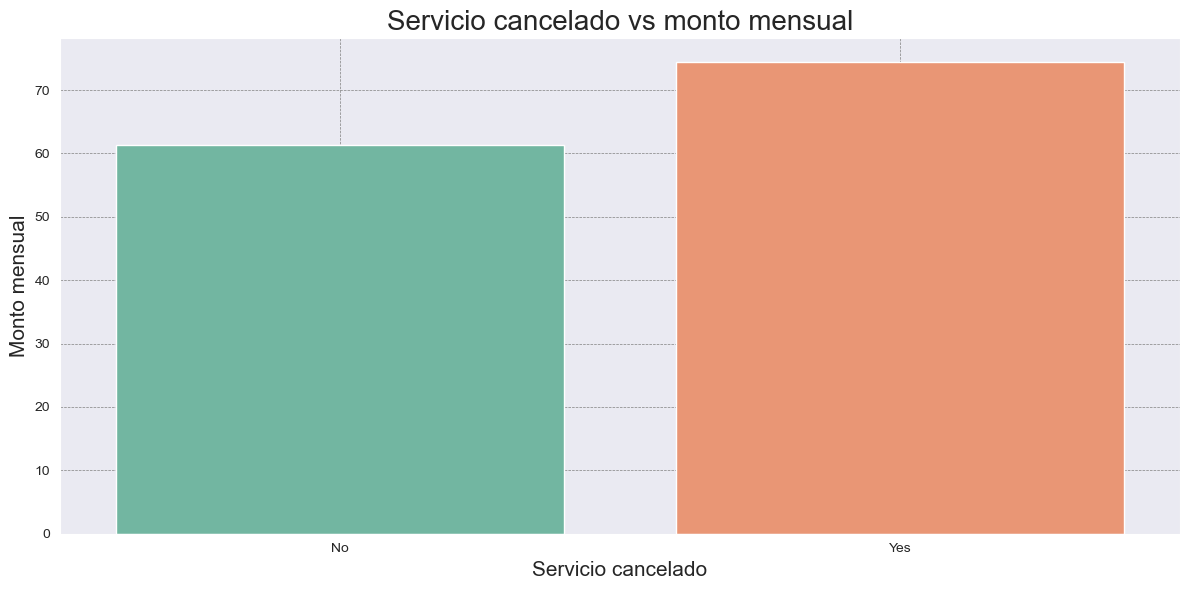

In [44]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("Set2", 2)

# barras
sns.barplot(data=df_grouped, x='Churn', y ='MonthlyCharges', hue ='Churn' , palette=colors, legend=False)

# titulos
ax.set_title('Servicio cancelado vs monto mensual', fontsize=20) 
ax.set_xlabel('Servicio cancelado', fontsize=15)
ax.set_ylabel('Monto mensual', fontsize=15)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede concluir que las personas que renunciaron al servicio en poco tiempo se debe a que pagaban un costo mensual más elevado. 